In [1]:
%pylab inline
import pymc3 as pm

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
K = 3
mu0 = [2, 25, 80]
p = [.1,.7,.2]
nsamp = 100
tmp = np.asarray([np.random.poisson(mu_, size=(100,)) for mu_ in mu0]).T
obs = tmp[range(nsamp), np.random.choice(K, nsamp, p)]

obs[obs<1] = 1
obs[obs>70] = 70

boundPoisson = pm.Bound(pm.Poisson, lower=1, upper=70)
with pm.Model() as m:
    w = pm.Dirichlet('w', np.ones(K))
    mu = pm.HalfNormal('mu', shape=K)
    bp = [boundPoisson.dist(mu=mu[i]) for i in range(K)] 
    x2 = pm.Mixture('obsx2', w, bp, observed=obs)
    trace = pm.sample()
    x2ppc = pm.sample_ppc(trace, 1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_log__, w_stickbreaking__]
INFO:pymc3:NUTS: [mu_log__, w_stickbreaking__]
100%|██████████| 1000/1000 [00:12<00:00, 79.31it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8860823061960025, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 

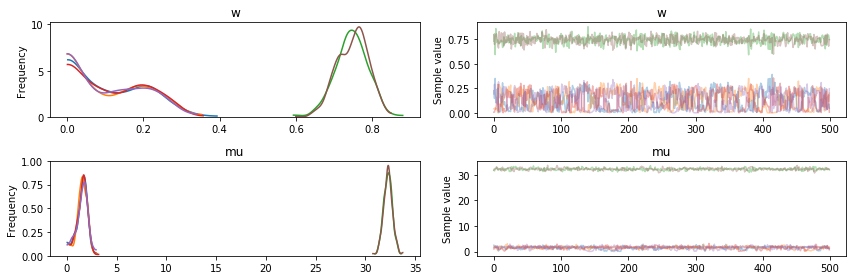

In [8]:
pm.traceplot(trace);

100%|██████████| 500/500 [00:01<00:00, 389.46it/s]


{'obsx2': array([34, 38, 36,  3, 31, 25, 38,  1, 31, 29, 39,  3, 48, 27, 38, 34,  3,
        34, 34,  2, 41, 37,  1, 29,  1, 31, 39, 33, 30, 29, 28,  1, 31, 40,
        45, 37,  2, 31, 32,  1,  2, 25, 28,  6, 38,  2, 38, 18,  1,  2,  2,
        28,  3, 28, 30, 35, 32, 29, 30, 36,  2, 42, 39,  1, 21, 39, 33, 33,
        29, 30, 31, 34, 40, 37,  2,  3, 38,  3, 31, 29, 27,  2, 22, 36, 22,
        34, 33, 39, 32, 33,  1,  2,  3, 34, 35, 36, 48, 28,  3, 42, 28, 23,
        32, 40, 26,  2, 35, 27, 36, 42,  4, 29, 35, 34,  2, 29, 41, 34, 30,
         4,  1, 31,  3, 19, 35,  3, 40, 36, 30, 29, 23,  3, 30,  3, 43, 34,
        35, 33, 31, 32, 30,  1, 34, 30, 31, 30, 39,  5,  1, 34, 22, 27, 35,
        26,  1, 34,  1, 38, 44,  1, 26, 36, 35, 32,  1, 20, 33, 22,  2, 32,
        26, 39, 42, 35, 38, 24,  2, 29, 34,  1,  1,  4, 31,  2, 37, 25,  2,
        24, 19, 45, 25, 28, 38, 33, 35, 31, 34, 27, 30,  3, 31, 34, 36, 34,
        39,  1,  2, 32,  3, 34, 40,  1,  2, 39, 34,  4, 31, 26,  3, 33,  3,
   

In [1]:
%pylab inline
import pymc3 as pm
import pymc3.distributions.transforms as tr

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = np.hstack([np.random.poisson(2.5, 100),
                  np.random.poisson(5.5, 300)])

In [3]:
chain_tran = tr.Chain([tr.log, tr.ordered])

with pm.Model() as model:
    lam = pm.Exponential('lam', lam=1, 
                         shape=2, 
                         transform=chain_tran, 
                         testval=np.asarray([1., 1.5]))
    pois = pm.Poisson.dist(mu=lam)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists=pois, observed=data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, lam]
100%|██████████| 1000/1000 [00:14<00:00, 68.35it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 221 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.07023748533750439, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


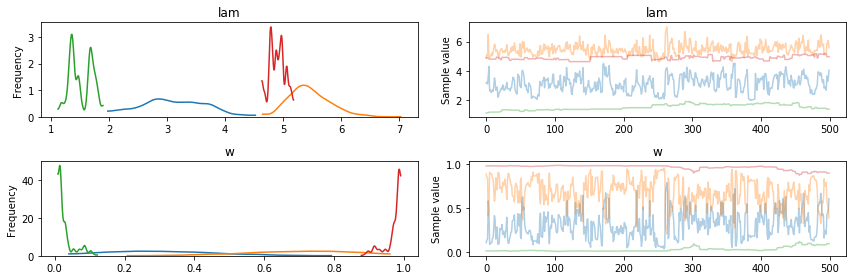

In [4]:
with model:
    trace = pm.sample()

pm.traceplot(trace);